### Decision Tree

A Decision Tree is build in a top down manner, from a root node and involves paritioning of the data into subsets. The subsets could be of similar type i.e. they could be homogenous or they could be dissimilar as well.
In Decision Tree feature or columns are called as 'Attributes'.
There are mainly two algorithms to control the splitting conditions in a Decision Tree:
1. Information Gain(Entropy)
2. Gini Index

Information Gain(Entropy):
1. Similar smaples in subset- Homogenous(The Entropy measures how homogenous the samples are)
2. If all samples in a subset are of same type(Target), then the entropy of that split is 0.
3. If the Entropy keeps decreasing, then we keep increasing our confidence over a predictive class.
a) Split in the direction where the entropy decreases.
4. The difference in the entropy before and after the split is called as Information Gain

Gini Index: It is the measure of Impurity. To find which split is the best we need to measure the Impurity and way to measure it is Gini index. The lesser the impurity, the better it is to split  on that column

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df_c=pd.read_excel("Churn_Modelling.xlsx")
df_c.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_c.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df_c=df_c.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

d_types=dict(df_c.dtypes)
for name,type_ in d_types.items():
  if str(type_) == 'object':
    le=LabelEncoder()
    df_c[name]=le.fit_transform(df_c[name])

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [ ]:
remaining_columns=list(df_c.columns)
remaining_columns.remove("Exited")

In [ ]:
X=df_c[remaining_columns].values
Y=df_c["Exited"].values.astype(np.uint8)

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier()

In [ ]:
print("Testing accuracy: ",model.score(Xtest,Ytest))

Testing accuracy:  0.79


In [ ]:
y_pred=model.predict(Xtest)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Ytest,y_pred))

0.79


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Ytest,y_pred)
cm

array([[1374,  230],
       [ 190,  206]])

Improve

In [ ]:
value_counts=dict(df_c["Exited"].value_counts())
print(value_counts)

{0: 7963, 1: 2037}


In [ ]:
for key,value in value_counts.items():
  value_counts[key]=value/len(df_c)
print(value_counts)

{0: 0.7963, 1: 0.2037}


In [ ]:
class_weights={}
for key,value in value_counts.items():
  class_weights[key] = sum(value_counts.values()) - value/sum(value_counts.values()) 
print(class_weights)

{0: 0.2037, 1: 0.7963}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier(max_depth=8,class_weight=class_weights)
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight={0: 0.2037, 1: 0.7963}, max_depth=8)

In [ ]:
print("Testing accuracy: ",model.score(Xtest,Ytest))

Testing accuracy:  0.783


In [ ]:
y_pred=model.predict(Xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Ytest,y_pred)
cm

array([[1271,  333],
       [ 101,  295]])

Visualizing Tree

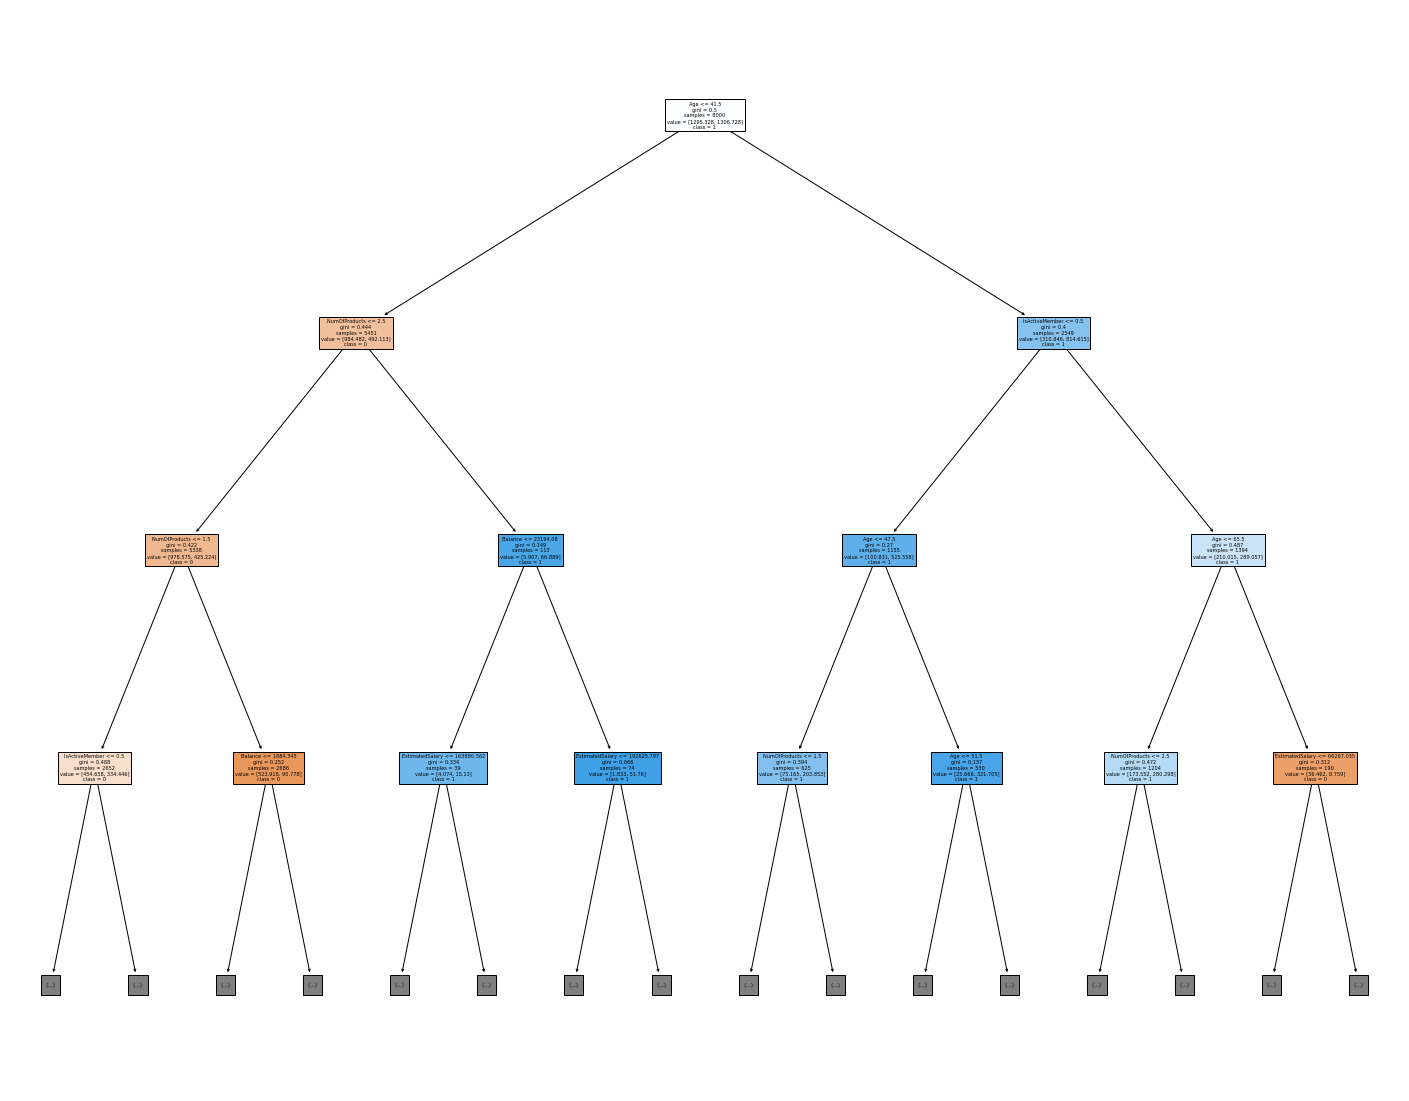

In [ ]:
from sklearn import tree

fig=plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
              max_depth=3,
              feature_names=df_c.columns[:-1],
              class_names=['0','1'],
              filled=True)

## Random Forest

In Random Forest we select random number of features to train our model.
How to chose those random set of faeture?
Ans: a) d=floor(sqrt(D)), for classification problem, 
     b) d=floor(D/3), for regression problem

Here 'D' is the total number of features and 'd' is random set of features to be selected.

In [ ]:
df_c=pd.read_excel("Churn_Modelling.xlsx")
df_c.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df_c=df_c.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder

d_types=dict(df_c.dtypes)
for name,type_ in d_types.items():
  if str(type_) == 'object':
    le=LabelEncoder()
    df_c[name]=le.fit_transform(df_c[name])

In [ ]:
remaining_columns=list(df_c.columns)
remaining_columns.remove("Exited")

In [ ]:
X=df_c[remaining_columns].values
Y=df_c["Exited"].values.astype(np.uint8)

In [ ]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=4)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(Xtrain,Ytrain)

RandomForestClassifier()

In [ ]:
print("Testing accuracy: ",model.score(Xtest,Ytest))

Testing accuracy:  0.8735


In [ ]:
y_pred=model.predict(Xtest)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Ytest,y_pred)
cm

array([[1551,   53],
       [ 200,  196]])

Improve

In [ ]:
value_counts=dict(df_c["Exited"].value_counts())
print(value_counts)

{0: 7963, 1: 2037}


In [ ]:
for key,value in value_counts.items():
  value_counts[key]=value/len(df_c)
print(value_counts)

{0: 0.7963, 1: 0.2037}


In [ ]:
class_weights={}
for key,value in value_counts.items():
  class_weights[key] = sum(value_counts.values()) - value/sum(value_counts.values()) 
print(class_weights)

{0: 0.2037, 1: 0.7963}


In [ ]:
Xtrain,Xval,Ytrain,Yval=train_test_split(X,Y,test_size=0.05,random_state=4)

In [ ]:
def getScores(model,Xtrain,Ytrain,Xval,Yval):
  return{
      "training acc": model.score(Xtrain,Ytrain),
      "validation acc": model.score(Xval,Yval),
      "obb_score": model.oob_score_
  }

In [ ]:
model=RandomForestClassifier(n_estimators=200,
                             min_samples_leaf=5,
                             class_weight=class_weights,
                             max_features=0.5,
                             n_jobs = -1,
                             oob_score=True)
model.fit(Xtrain,Ytrain)

RandomForestClassifier(class_weight={0: 0.2037, 1: 0.7963}, max_features=0.5,
                       min_samples_leaf=5, n_estimators=200, n_jobs=-1,
                       oob_score=True)

In [ ]:
getScores(model,Xtrain,Ytrain,Xval,Yval)

{'obb_score': 0.8426315789473684,
 'training acc': 0.9375789473684211,
 'validation acc': 0.862}

In [ ]:
print("Testing accuracy: ",model.score(Xval,Yval))

Testing accuracy:  0.862


In [ ]:
y_pred=model.predict(Xval)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Yval,y_pred)
cm

array([[358,  38],
       [ 31,  73]])